# Sale Price prediction of Bulldozers using Machine Learning

### Problem
- What's the best model to predict the future sale price of a bulldozer? 
  Using its previous data of how much similar bulldozers have been sold and its characterstics.

### Data
#### The dataset used in this project is from the Kaggle Bluebook for Bulldozers competition.
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 to April 30, 2012.
* Test.csv is the test set, which will be used to make final prediction and it contains data from May 1, 2012 to November 2012.

### Evaluation 

- The evaluation metric for this project is `root mean squared log error` (RMSLE) between the actual and predicted prices. 
- The goal for the regression evaluation metrics used in this project is to minimize RMSLE of the machine learning model.

### Features 
- The data dictionary is from Kaggle. To view the data dictionary on Google Sheets:
  https://docs.google.com/spreadsheets/d/1xWwUEzyQaj110dQryiYM3k4n10Dnb9jXlsfSnERUECQ/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.shape, df.dtypes

((412698, 53),
 SalesID                       int64
 SalePrice                   float64
 MachineID                     int64
 ModelID                       int64
 datasource                    int64
 auctioneerID                float64
 YearMade                      int64
 MachineHoursCurrentMeter    float64
 UsageBand                    object
 saledate                     object
 fiModelDesc                  object
 fiBaseModel                  object
 fiSecondaryDesc              object
 fiModelSeries                object
 fiModelDescriptor            object
 ProductSize                  object
 fiProductClassDesc           object
 state                        object
 ProductGroup                 object
 ProductGroupDesc             object
 Drive_System                 object
 Enclosure                    object
 Forks                        object
 Pad_Type                     object
 Ride_Control                 object
 Stick                        object
 Transmission          

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

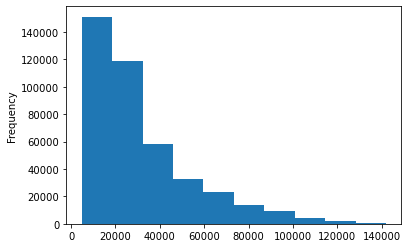

In [6]:
df.SalePrice.plot.hist();

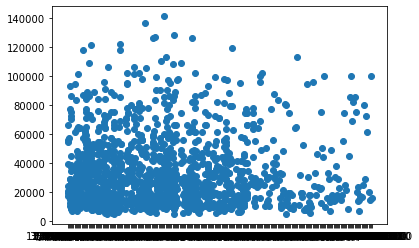

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1500], df["SalePrice"][:1500]);

 Using `parse_dates` to re-import the dataset

In [8]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [9]:
df.saledate[:1500], df.saledate.dtype

(0      2006-11-16
 1      2004-03-26
 2      2004-02-26
 3      2011-05-19
 4      2009-07-23
           ...    
 1495   2008-11-06
 1496   2009-08-13
 1497   2010-11-18
 1498   2007-10-25
 1499   2008-04-17
 Name: saledate, Length: 1500, dtype: datetime64[ns],
 dtype('<M8[ns]'))

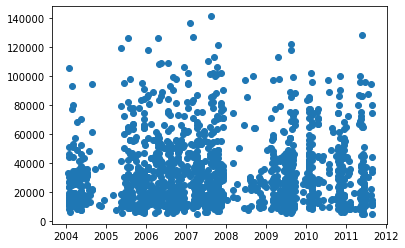

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1500], df["SalePrice"][:1500]);

In [11]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [12]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [13]:
# Sorting DataFrame by saledate in the order of date for the time series data
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

Making a temporary DataFrame copy of the original DataFrame for experimentations.

In [14]:
df_temp = df.copy()
df_temp.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

Adding datetime parameters for `saledate` column

In [15]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


Removing `saledate` after adding the datetime parameters

In [16]:
df_temp.drop("saledate", axis=1, inplace=True)

Evaluating the values of different columns

In [17]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [18]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [19]:
# Converting strings to categories 
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [22]:
# Checking the missing data
df_temp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [30]:
# Exporting the preprocessed data
df_temp.to_csv("data/bluebook-for-bulldozers/train_temp.csv",
               index=False)

In [31]:
df_temp = pd.read_csv("data/bluebook-for-bulldozers/train_temp.csv",
                      low_memory=False)

#### Filling the numeric missing values

In [32]:
for label, conent in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [33]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [34]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [35]:
# Filling the numeric values with the median (creating a new binary column)
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"is_missing"] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median())

In [37]:
# Re-checking for missing numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [38]:
df_temp.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [39]:
df_temp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

#### Filling the categorical values

In [40]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
# Converting categorical values into numeric with a new binary column
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_is_missing"] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes+1

In [43]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [45]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: user 25min 42s, sys: 17.7 s, total: 26min
Wall time: 2min


RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875468079970562

In [50]:
# Spliting the dataset into training and validation set.

df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

Using only `2012` for `validation set` 
(Please refer to the `validation split protocol` on `Kaggle` for this specific dataset) 

In [52]:
df_val = df_temp[df_temp.saleYear ==2012]
df_train = df_temp[df_temp.saleYear != 2012]

In [53]:
len(df_val), len(df_train)

(11573, 401125)

In [54]:
# Spliting data into X and y

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Evaluating

Creating an evaluation function of `RMSLE` (Root mean squared log error)

In [56]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# another function for evaluating further
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Train RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Train R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [61]:
# Tesing the model on a small subset (To save time for tuning the hyperparameters)
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [62]:
%%time
model.fit(X_train, y_train)

CPU times: user 43.7 s, sys: 1.12 s, total: 44.8 s
Wall time: 5.89 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [64]:
%%time
show_scores(model)

CPU times: user 11.9 s, sys: 427 ms, total: 12.3 s
Wall time: 3.01 s


{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Train R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

`Valid MAE` > `Train MAE` = **No overfitting found**

#### Tuning hyperparameters using `RandomizedSearchCV`

In [85]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 19min 17s, sys: 2min 34s, total: 21min 51s
Wall time: 26min 47s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [88]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [90]:
show_scores(rs_model)

{'Train MAE': 5736.551423130501,
 'Valid MAE': 7314.7484256779235,
 'Train RMSLE': 0.2637231431838734,
 'Valid RMSLE': 0.2978581540083429,
 'Train R^2': 0.8515449932183022,
 'Valid R^2': 0.8245401325949236}

In [91]:
best_model = RandomForestRegressor(n_estimators=80,
                                   min_samples_split=12,
                                   min_samples_leaf=1,
                                   max_features="auto",
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
best_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=12, n_estimators=80, n_jobs=-1,
                      random_state=42)

In [92]:
show_scores(best_model)

{'Train MAE': 2649.6576431635726,
 'Valid MAE': 6102.737965819077,
 'Train RMSLE': 0.13206012344536183,
 'Valid RMSLE': 0.25308625736128804,
 'Train R^2': 0.9658682421751545,
 'Valid R^2': 0.8733240872555174}

In [93]:
show_scores(rs_model) 

{'Train MAE': 5736.551423130501,
 'Valid MAE': 7314.7484256779235,
 'Train RMSLE': 0.2637231431838734,
 'Valid RMSLE': 0.2978581540083429,
 'Train R^2': 0.8515449932183023,
 'Valid R^2': 0.8245401325949236}

# Predictions on the test data

In [147]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

In [148]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [149]:
# Processing the test dataset 
def raw_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = pd.Categorical(content).codes+1    
    return df                     

In [150]:
df_test = raw_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [153]:
set(X_train.columns) - set(df_test.columns)

{'MachineHoursCurrentMeteris_missing', 'auctioneerIDis_missing'}

In [154]:
df_test["auctioneerIDis_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [162]:
test_preds = best_model.predict(df_test)
test_preds

/Users/hemanth/Desktop/bulldozer-price-prediction/env/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MachineHoursCurrentMeter_is_missing
Feature names seen at fit time, yet now missing:
- MachineHoursCurrentMeteris_missing

  warnings.warn(message, FutureWarning)


array([21250.07871818, 24027.43904716, 47873.97678761, ...,
       12275.76243297, 17549.71158182, 30225.67252556])

In [163]:
# For Kaggle submission, according to its competition protocol
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21250.078718
1,1227844,24027.439047
2,1227847,47873.976788
3,1227848,78079.927085
4,1227863,46969.755147
...,...,...
12452,6643171,53145.584540
12453,6643173,11550.709219
12454,6643184,12275.762433
12455,6643186,17549.711582


#### Exporting 

In [165]:
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

In [169]:
(best_model.feature_importances_), len(best_model.feature_importances_), X_train.shape

(array([4.73862952e-02, 1.29062643e-02, 3.27406333e-02, 2.06430998e-04,
        3.32575753e-03, 2.69140141e-01, 2.64197023e-03, 8.65065948e-04,
        1.98893210e-02, 8.07374191e-02, 5.29584451e-02, 4.34024434e-03,
        3.41873337e-03, 2.34505091e-01, 4.08822161e-02, 6.63633185e-03,
        1.90955664e-04, 1.71374655e-04, 1.74099345e-03, 8.40103701e-03,
        3.14400825e-04, 2.95229292e-05, 4.74155328e-04, 1.64049257e-04,
        1.54630494e-03, 2.18205658e-05, 2.28479674e-04, 6.31837521e-03,
        3.23371404e-04, 4.35271130e-04, 2.67606413e-03, 3.08388184e-03,
        2.11435973e-03, 3.84799630e-03, 1.87891045e-04, 1.44493167e-03,
        7.45987452e-04, 1.43563775e-02, 7.70552782e-06, 6.46439681e-06,
        1.61667165e-04, 9.23574703e-04, 1.03225835e-03, 5.91700510e-04,
        1.85362422e-04, 3.53686297e-04, 2.12702576e-04, 1.40102681e-03,
        8.74389722e-04, 1.26592361e-04, 2.18789926e-04, 7.73910251e-02,
        1.92411076e-03, 6.42851523e-03, 3.05261898e-03, 1.248139

In [178]:
# Plotting Feature Importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

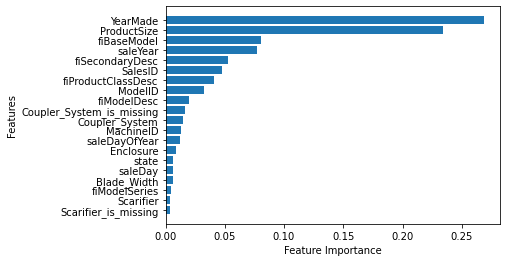

In [179]:
plot_features(X_train.columns, best_model.feature_importances_)